<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex9_CausalImpact_Voyager_SunActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Colab includes the Causal Impact analysis of Voyager Cosmic Ray Data (4 MeV) from 1977 vs. the Solar Activity Near Earth.**

Question:
Is Interstellar Entry an actual event or is it a result of variable solar activity?


Data:
1.   Voyager 1 and 2 Cosmic Ray data is available from NASA Godard (GSFC) Space Physics Data Facility: https://spdf.gsfc.nasa.gov/data_orbits.html
2.   Solar Activity Near Earth is obtained from NASA GSFC Omni database:
[link](https://omniweb.sci.gsfc.nasa.gov/html/overview.html)
The OMNI 2 data set contains hourly resolution solar wind magnetic field and plasma data from many spacecraft in geocentric orbit and in orbit about the L1 Lagrange point ~225 Re in front of the Earth. 



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

import altair as alt

Voyager 1 and 2 Cosmic Ray Flux per year since launch in 1977


In [0]:
newlist = []

col1=1  # up to 4.6 MeV/n Hydrogen flux 
col2=2  # up to 6.2 MeV/n Hydrogen flux
col3=15 # up to 346 MeV/n protons
col4=16 # 4.6 MeV/n Helium flux 
col5=17 # 6.2 MeV/n Helium flux 
col6=34 # 661 MeV/n Helium flux 

#Voyager 1
for i in range(1977, 2020): #2020):
    #print(i)
    urlx= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager1/particle/crs/six_hour/vy1crs_6hour_' + str(i) +'.asc'
    #print(urlx) works!
    df = pd.read_table(urlx,
                  sep="\s+",
                  skiprows=[i for i in range(0,35)], 
                  usecols=[0, col1, col2, col3, col4, col5, col6],
                  names=['year_time', 'p_4MeV', 'p_6MeV', 'p_346MeV', 'He_4MeV', 'He_6MeV', 'He_661MeV'])
    mean1 = np.median(df.p_4MeV)
    mean2 = np.median(df.p_6MeV)
    mean3 = np.median(df.p_346MeV)
    mean4 = np.median(df.He_4MeV)
    mean5 = np.median(df.He_6MeV)
    mean6 = np.median(df.He_661MeV)
    newlist.append((i, mean1, mean2, mean3, mean4, mean5, mean6)) #, mean)   
df0=pd.DataFrame(newlist, columns=('year', 'av_p4', 'av_p6', 'av_p346','av_He4', 'av_He6', 'av_He661' ))
#print(df0)

#Voyager 2
newlist1 = []
for i in range(1977, 2020): #2020):
    #print(i)url6= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/particle/crs/one_day/vy2crs_1d_1977.asc'
    urlx= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/particle/crs/one_day/vy2crs_1d_' + str(i) +'.asc'
    #print(urlx) works!
    df = pd.read_table(urlx,
                  sep="\s+",
                  skiprows=[i for i in range(0,38)], 
                  usecols=[0, col1, col2, col3, col4, col5, col6],
                  names=['year_time', 'p_4MeV', 'p_6MeV', 'p_346MeV', 'He_4MeV', 'He_6MeV', 'He_661MeV'])
    mean1 = np.median(df.p_4MeV)
    mean2 = np.median(df.p_6MeV)
    mean3 = np.median(df.p_346MeV)
    mean4 = np.median(df.He_4MeV)
    mean5 = np.median(df.He_6MeV)
    mean6 = np.median(df.He_661MeV)
    newlist1.append((i, mean1, mean2, mean3, mean4, mean5, mean6)) #, mean)   
df00=pd.DataFrame(newlist1, columns=('year', 'av_p4', 'av_p6', 'av_p346','av_He4', 'av_He6', 'av_He661' ))
#print(df00)

#check distribution + outliers (if many outliers use the median if not truncate it, make outliers equal to 99 uper percentile )
#put data gt than 95percentile eq to 95


Voyager 1 and 2 Trajectory per year since launch in 1977


In [0]:
# Voyagers Trajectories

# Voyager 1:
# Voyager 1 Interplanetary Cruise Trajectory Data from the NSSDC Satellite
# Situation Center (SSC) - Daily Values for 1977 to 2005
# SECLAT= SOLAR ECLIPTIC LATITUDE IN DEGREES
#heliocentric ecliptic coordinates
# 1.6. The Geocentric Ecliptical Longitude and Latitude
#https://aa.quae.nl/en/reken/hemelpositie.html
#lambda = 168.737 deg
#beta = 1.208 deg

url9= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager1/traj/ssc/vy1trj_ssc_1d.asc'
df9 = pd.read_csv(url9, header=None, 
                  sep='\s+',
                  usecols=[0,1,2,3,4,5,6,7],
                  names=['YY', 'DDD',  'RAD',  'SECLAT',  'SECLON',  'HELLAT',  'HELLON',  'HILLON'])

# Voyager 2:
# Voyager 2 Interplanetary Cruise Trajectory Data from the NSSDC Satellite
# Situation Center (SSC) - Daily Values for 1977 to 2005
# https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/traj/ssc/vy2trj_ssc_1d.asc

url10= 'https://spdf.gsfc.nasa.gov/pub/data/voyager/voyager2/traj/ssc/vy2trj_ssc_1d.asc'
df10 = pd.read_csv(url10, header=None, 
                  sep='\s+',
                  usecols=[0,1,2,3,4,5,6,7],
                  names=['YY', 'DDD',  'RAD',  'SECLAT',  'SECLON',  'HELLAT',  'HELLON',  'HILLON'])
print(df10)

        YY    DDD    RAD  SECLAT  SECLON   HELLAT  HELLON  HILLON
0     1977  237.0   1.01     0.1   333.0   7.1673  122.98  257.45
1     1977  238.0   1.00     0.1   334.3   7.2010  110.10  258.76
2     1977  239.0   1.00     0.1   335.6   7.2311   97.23  260.07
3     1977  240.0   1.00     0.1   336.9   7.2575   84.35  261.38
4     1977  241.0   1.00     0.2   338.2   7.3802   71.48  262.68
...    ...    ...    ...     ...     ...      ...     ...     ...
9995  2005    5.0  75.34   -29.8   288.2 -25.7517  148.01  215.53
9996  2005    6.0  75.35   -29.8   288.2 -25.7517  133.83  215.53
9997  2005    7.0  75.35   -29.8   288.2 -25.7517  119.64  215.53
9998  2005    8.0  75.36   -29.8   288.2 -25.7517  105.46  215.53
9999  2005    9.0  75.37   -29.8   288.2 -25.7517   91.27  215.53

[10000 rows x 8 columns]


Solar Activity Near Earth since Voyager launch

In [0]:
#  IMF and Solar Wind near Earth's orbit, Sun activity
#  https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/

#  hourly mean values of the interplanetary magnetic  field (IMF) and solar wind plasma parameters 
#  measured by various spacecraft near  the  Earth's  orbit,  as  well  as  
#  geomagnetic and solar activity indices, and energetic proton fluxes
#  known as OMNI2 data. 

url = 'https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni_yearly.dat'
df2 = pd.read_csv(url, sep="\s+", header=None, usecols=[0,8,22,23,27,39, 42,54],
                  names=['year', 'B_field', 'proton_temperature', 'proton_density',
                         'alpha_proton','sunspots','proton_flux','mach_number'])

#print(df2)
df2s=df2[df2['year']>1976]
df2s=df2s[df2s['proton_flux']< 999999.99]
df2s



,year,B_field,proton_temperature,proton_density,alpha_proton,sunspots,proton_flux,mach_number
14,1977,5.9,104352.0,8.9,0.039,39,16.20,5.8
15,1978,7.2,112892.0,7.9,0.043,131,269.45,5.4
16,1979,7.6,106917.0,7.0,0.054,220,122.51,4.9
17,1980,7.0,82221.0,7.0,0.063,219,49.84,5.0
18,1981,7.9,109426.0,7.1,0.064,199,241.23,5.0
19,1982,8.8,139668.0,8.4,0.061,162,203.59,5.3
20,1983,8.0,144139.0,8.0,0.053,91,47.23,5.5
21,1984,7.8,148798.0,8.0,0.051,60,67.40,5.5
22,1985,5.9,123895.0,8.7,0.035,21,17.29,6.1
23,1986,5.8,108923.0,8.5,0.039,15,33.92,6.3


PairPlot of Sun Activity Near Earth

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


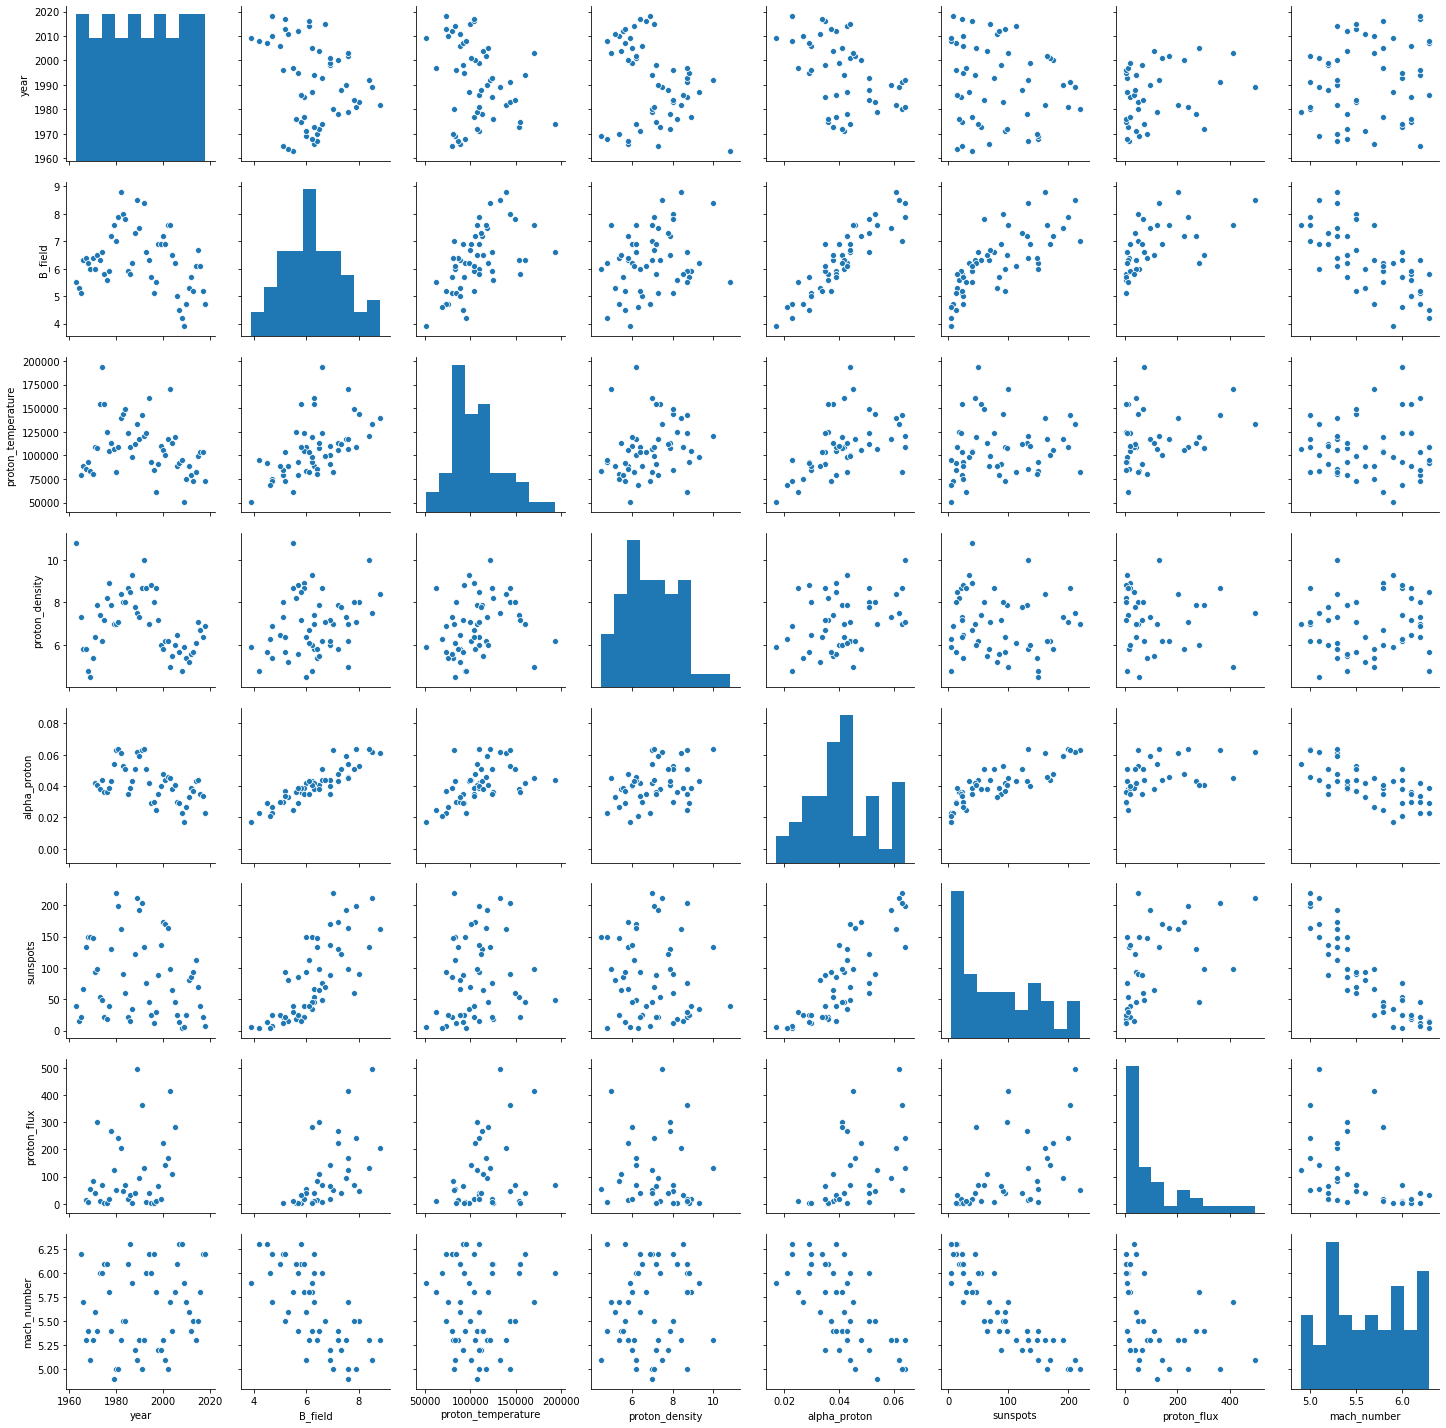

In [0]:
# Understanding the data: are there outliers?
# sns.pairplot(df2) 
# Shows a lot of outliers in the dataframe!

# try cleaning up the dataframe from outliers:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

# df2c=df2[np.abs(df2-df2.median()) <= (3*df2.std())] didnt work well w mean nor median

# filtering by 0.99 quantile worked really well!
q = df2.quantile(0.99)
df2c = df2[df2 < q]
sns.pairplot(df2c)

# Correlations:
# Bfield with p temp, alpha/proton, 
# alpha/proton w sunpots
# Sunspots w mach number



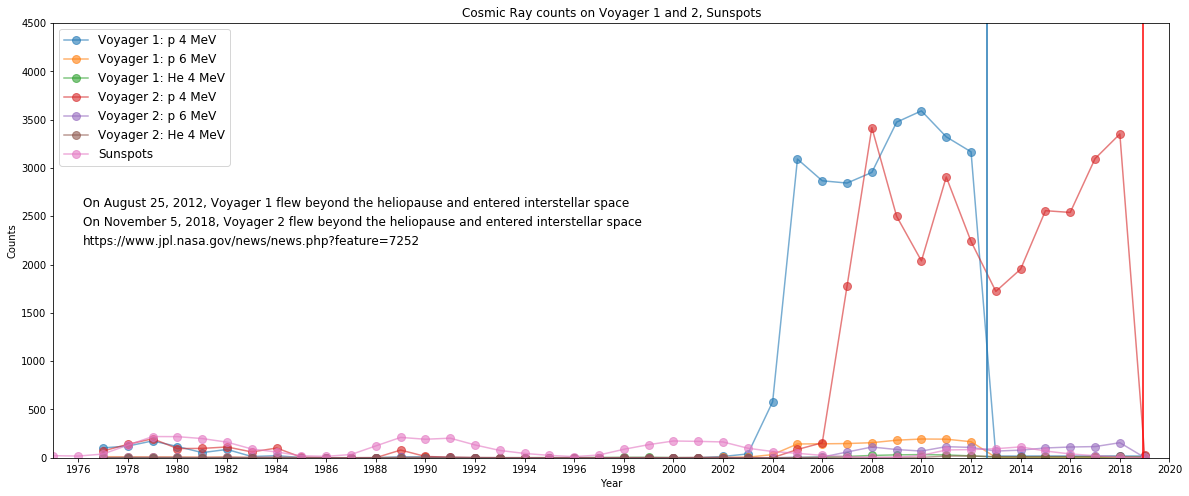

In [0]:
plt.figure(figsize=(20, 8))

#Voyager 1
plt.plot(df0.year,df0.av_p4, label='Voyager 1: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_p6, label='Voyager 1: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df0.year,df0.av_He4, label='Voyager 1: He 4 MeV', marker='o', markersize=8, alpha=0.6)

#Voyager 2
plt.plot(df00.year,df00.av_p4, label='Voyager 2: p 4 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_p6, label='Voyager 2: p 6 MeV', marker='o', markersize=8, alpha=0.6)
plt.plot(df00.year,df00.av_He4, label='Voyager 2: He 4 MeV', marker='o', markersize=8, alpha=0.6)


plt.plot(df2.year, df2.sunspots, label='Sunspots', marker='o', markersize=8, alpha=0.6)

plt.title('Cosmic Ray counts on Voyager 1 and 2, Sunspots')

plt.text(1976.2, 2600, 'On August 25, 2012, Voyager 1 flew beyond the heliopause and entered interstellar space',fontsize=12)
plt.text(1976.2, 2400, 'On November 5, 2018, Voyager 2 flew beyond the heliopause and entered interstellar space',fontsize=12)
plt.text(1976.2, 2200, 'https://www.jpl.nasa.gov/news/news.php?feature=7252',fontsize=12)

plt.axvline(x=2012.66)
plt.axvline(x=2018.92, c='r')

plt.legend(prop = { 'size' : 12 },loc='upper left')

plt.xlim(1975, 2020)
plt.ylim(0, 4500) #300)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.ylabel("Counts")
plt.xlabel("Year")

plt.show()


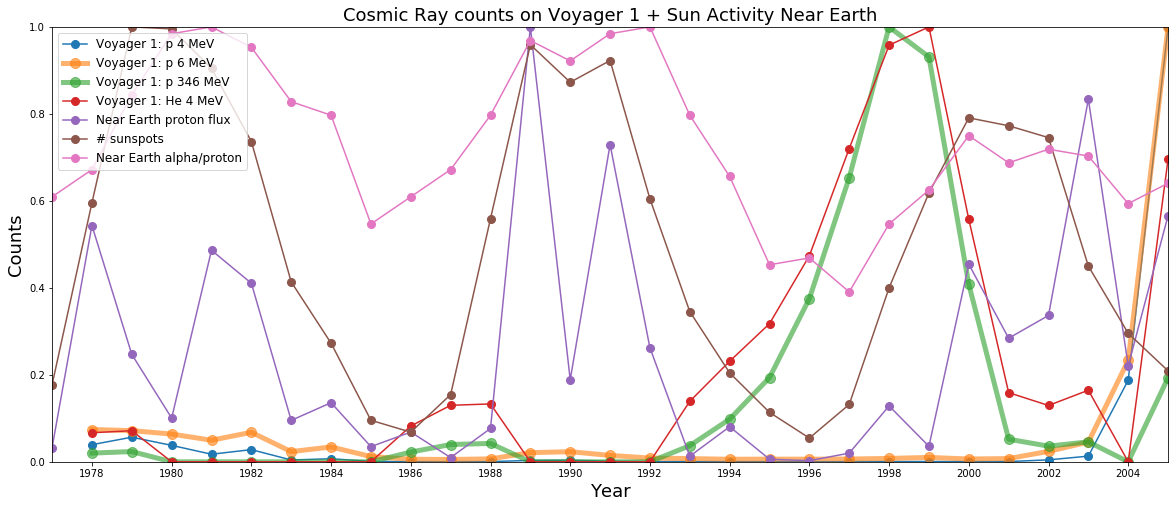

In [0]:
plt.figure(figsize=(20, 8))

# #Voyager 1
df0s=df0[(df0['year']<2006) & (df0['year']>1977)]  
plt.plot(df0s.year,df0s.av_p4/df0s.av_p4.max(), label='Voyager 1: p 4 MeV', marker='o', markersize=8 )

plt.plot(df0s.year,df0s.av_p6/df0s.av_p6.max(), label='Voyager 1: p 6 MeV  ', marker='o', markersize=10, linewidth=5, alpha=0.6)

plt.plot(df0s.year,df0s.av_p346/df0s.av_p346.max(), label='Voyager 1: p 346 MeV ', marker='o', markersize=10, linewidth=5, alpha=0.6)

plt.plot(df0s.year,df0s.av_He4/df0s.av_He4.max(), label='Voyager 1: He 4 MeV', marker='o', markersize=8 )


# #protons around Earth
plt.plot(df2s.year, df2s.proton_flux/df2s.proton_flux.max(), label='Near Earth proton flux', marker='o', markersize=8 )

# sunspots
plt.plot(df2s.year, df2s.sunspots/df2s.sunspots.max(), label='# sunspots', marker='o', markersize=8 )

# alpha/proton
plt.plot(df2s.year, df2s.alpha_proton/df2s.alpha_proton.max(), label='Near Earth alpha/proton', marker='o', markersize=8)


plt.title('Cosmic Ray counts on Voyager 1 + Sun Activity Near Earth', fontsize=18)

plt.axvline(x=2012.66)
plt.axvline(x=2018.92, c='r')

plt.legend(prop = { 'size' : 12 },loc='upper left')

plt.xlim(1977, 2005)
plt.ylim(0, 1) #300)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.ylabel("Counts", fontsize=18)
plt.xlabel("Year", fontsize=18)

plt.show()

3.9405


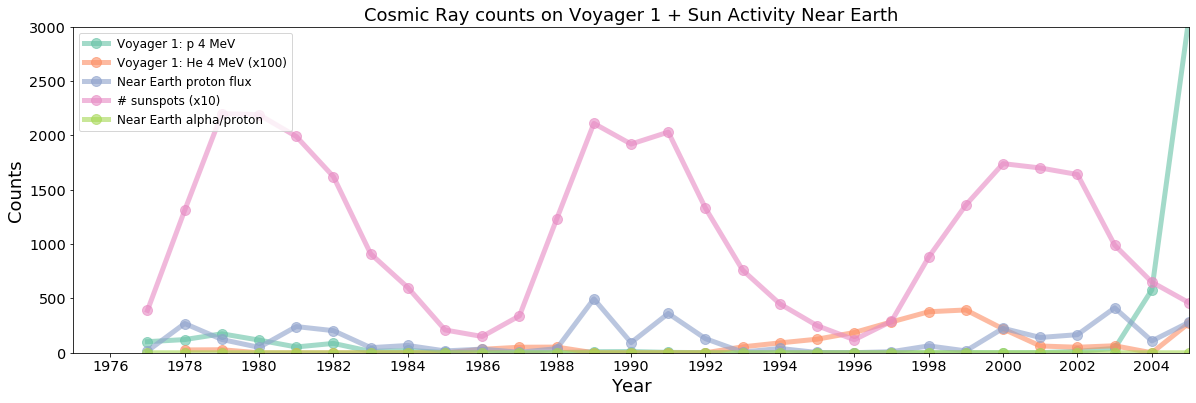

In [0]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.rcParams["image.cmap"] = "Pastel1" #"Set1"
# to change default color cycle
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors) #Paired
#https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

plt.figure(figsize=(20, 6))

# #Voyager 1
plt.plot(df0.year,df0.av_p4, label='Voyager 1: p 4 MeV', marker='o', markersize=10, linewidth=5, alpha=0.6)

#plt.plot(df0.year,100*df0.av_p6, label='Voyager 1: p 6 MeV (x100)', marker='o', markersize=10, linewidth=5, alpha=0.6)

#plt.plot(df0.year,100*df0.av_p346, label='Voyager 1: p 346 MeV (x100)', marker='o', markersize=10, linewidth=5, alpha=0.6)

plt.plot(df0s.year,100*df0s.av_He4, label='Voyager 1: He 4 MeV (x100)', marker='o', markersize=10, linewidth=5, alpha=0.6)

print(df0s.av_He4.max())

# #protons around Earth
plt.plot(df2s.year, df2s.proton_flux, label='Near Earth proton flux', marker='o', markersize=10, linewidth=5, alpha=0.6)

# sunspots
plt.plot(df2s.year, 10*df2s.sunspots, label='# sunspots (x10)', marker='o', markersize=10, linewidth=5, alpha=0.6)

# alpha/proton
plt.plot(df2s.year, df2s.alpha_proton, label='Near Earth alpha/proton', marker='o', markersize=10, linewidth=5, alpha=0.6)


plt.title('Cosmic Ray counts on Voyager 1 + Sun Activity Near Earth', fontsize=18)

plt.axvline(x=2012.66)
plt.axvline(x=2018.92, c='r')

plt.legend(prop = { 'size' : 12 },loc='upper left')

plt.xlim(1975, 2005)
plt.ylim(0, 3000) #300)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.ylabel("Counts", fontsize=18)
plt.xlabel("Year", fontsize=18)

plt.show()

In [0]:
!pip install pycausalimpact
from causalimpact import CausalImpact

#!pip install git+https://github.com/jamalsenouci/causalimpact.git

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.

         V1 p   Sun p  Sunspots   He/p  B field  log(p Temp)  p Dens  Mach
0    121.6000  269.45       131  0.043      7.2     5.052663     7.9   5.4
1    174.9000  122.51       220  0.054      7.6     5.029047     7.0   4.9
2    116.8000   49.84       219  0.063      7.0     4.914983     7.0   5.0
3     53.7300  241.23       199  0.064      7.9     5.039121     7.1   5.0
4     86.4900  203.59       162  0.061      8.8     5.145097     8.4   5.3
5     12.8500   47.23        91  0.053      8.0     5.158782     8.0   5.5
6     21.7000   67.40        60  0.051      7.8     5.172597     8.0   5.5
7      2.8080   17.29        21  0.035      5.9     5.093054     8.7   6.1
8      1.0180   33.92        15  0.039      5.8     5.037120     8.5   6.3
9      0.8942    4.80        34  0.043      6.2     4.991912     9.3   5.9
10     1.3655   38.03       123  0.051      7.3     5.048259     7.8   5.2
11     9.8920  495.89       211  0.062      8.5     5.123195     7.5   5.1
12    11.5000   93.55    

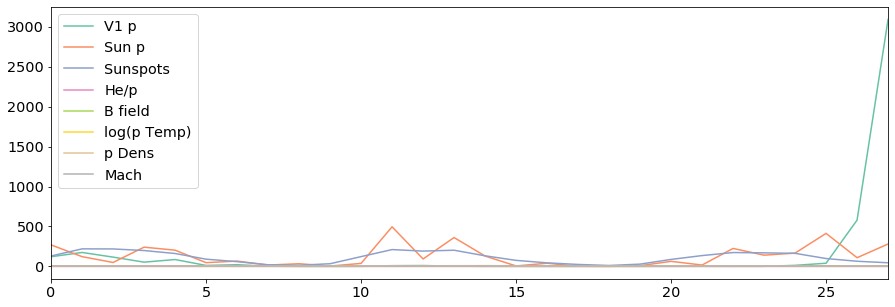

In [0]:
# Data in Causal Impact format

#Proton flux registered by Voyager 1: the series that we try to understand
#m2=max(df0s.av_p4)
#slice df0 from 1977 to 2005 including
df0s=df0[(df0['year']<2006) & (df0['year']>1977)]  

y_series = (df0s.av_p4)
y = y_series.as_matrix()

#He flux registered by Voyager 1
y_series2 = (df0s.av_He4)
y2 = y_series2.as_matrix()

#The following are the co-variates, time series that should approx. behave like Voyager until Voyager enters the ISM:

#proton flux around earth from 1977 to 2005
#m1=max(df2s.proton_flux)
m1=1
df2s=df2s[(df2s['year']>1977)]
x_series = (df2s.proton_flux)/m1
X = x_series.as_matrix()
#X = y/100 + 2 # test to see if Causal impact gave perfect inference

#sunspots
x_series2 = (df2s.sunspots)
X2 = x_series2.as_matrix()

#alpha_proton
x_series3 = (df2s.alpha_proton)
X3 = x_series3.as_matrix()

#B-field
x_series4 = (df2s.B_field)
X4 = x_series4.as_matrix()

#proton temp
x_series5 = (df2s.proton_temperature)
x_series5 = np.log10(x_series5)
X5 = x_series5.as_matrix()

#proton density
x_series6 = (df2s.proton_density)
X6 = x_series6.as_matrix()

#mach_number
x_series7 = (df2s.mach_number)
X7 = x_series7.as_matrix()

#fake X made of Y to check if program runs well
#X8 = y/100

data = pd.DataFrame({'y': y, 'X': X, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'X7': X7}, columns=['y', 'X', 'X2','X3','X4','X5','X6','X7'])

data = pd.DataFrame({'V1 p': y, 'Sun p': X, 'Sunspots': X2, 'He/p': X3, 'B field': X4, 'log(p Temp)': X5, 'p Dens': X6, 'Mach': X7}, 
                    columns=['V1 p', 'Sun p', 'Sunspots','He/p','B field','log(p Temp)','p Dens','Mach'])

data.plot()
#data = pd.DataFrame({'y': y, 'X4': X4}, columns=['y', 'X4'])

print(data)



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    931.24             3724.95
Prediction (s.d.)         -26.01 (22.15)     -104.03 (88.6)
95% CI                    [-66.05, 20.78]    [-264.19, 83.13]

Absolute effect (s.d.)    957.25 (22.15)     3828.98 (88.6)
95% CI                    [910.45, 997.28]   [3641.82, 3989.14]

Relative effect (s.d.)    -3680.64% (85.17%) -3680.64% (85.17%)
95% CI                    [-3834.6%, -3500.73%][-3834.6%, -3500.73%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 931.24. By contrast, in the absence of an
intervention, we would have expected an average response of -26.01.
The 95% interval of this counterfactual prediction is [-66.05, 20.78].
Subtracting this pr

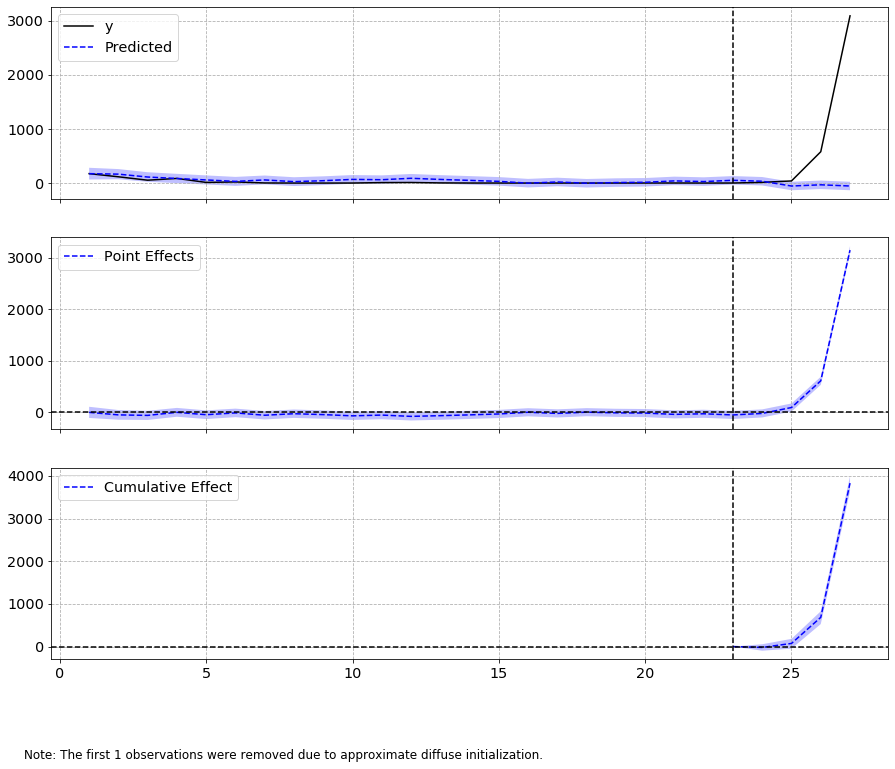

In [0]:
pre_period = [0, 23]
post_period = [24, 27]

ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

# cut_off_point = 24
# pre_period = [0,cut_off_point-1]
# post_period = [cut_off_point,data.shape[0]-1]
# impact = CausalImpact(data, pre_period, post_period)
# impact.plot()



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    931.24             3724.95
Prediction (s.d.)         18.83 (21.87)      75.31 (87.47)
95% CI                    [-24.09, 61.63]    [-96.34, 246.54]

Absolute effect (s.d.)    912.41 (21.87)     3649.64 (87.47)
95% CI                    [869.6, 955.32]    [3478.41, 3821.29]

Relative effect (s.d.)    4845.85% (116.14%) 4845.85% (116.14%)
95% CI                    [4618.51%, 5073.78%][4618.51%, 5073.78%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 931.24. By contrast, in the absence of an
intervention, we would have expected an average response of 18.83.
The 95% interval of this counterfactual prediction is [-24.09, 61.63].
Subtracting this predi

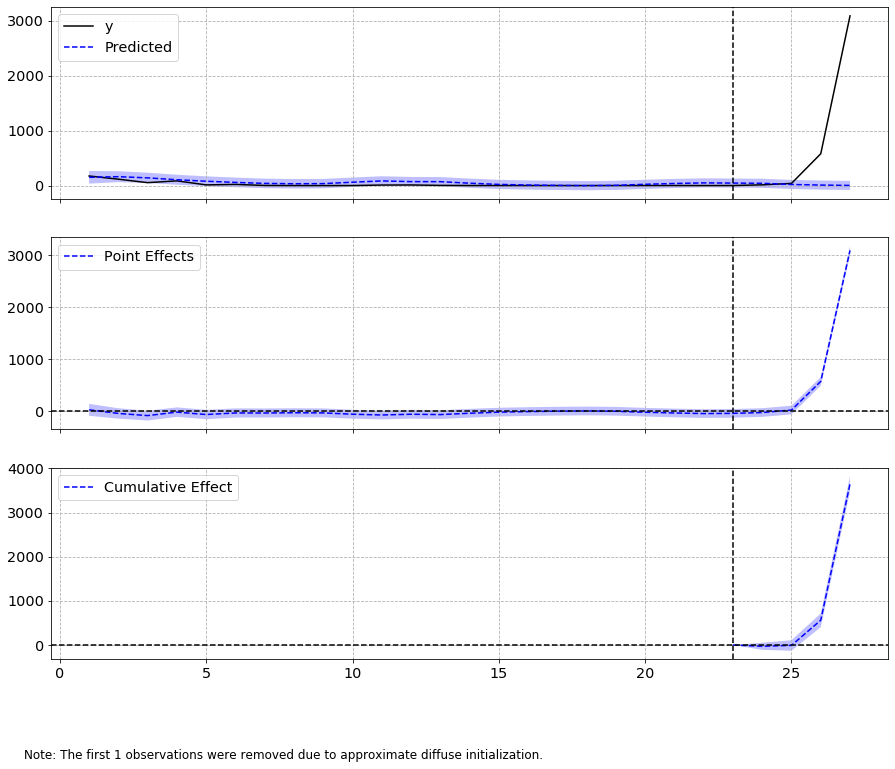

In [0]:
data2 = pd.DataFrame({'y': y, 'X2': X2}, columns=['y', 'X2'])

data2

pre_period = [0, 23]
post_period = [24, 27]

ci = CausalImpact(data2, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()
